In [4]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  Conv2D,MaxPooling2D, Dense,Flatten,Dropout,Activation

In [5]:
train=np.loadtxt('mnist_train.csv',delimiter=',')
test=np.loadtxt('mnist_test.csv',delimiter=',')

In [6]:
print('Train Shape:',train.shape)
print('Test Shape:',test.shape)

Train Shape: (60000, 785)
Test Shape: (10000, 785)


In [7]:
labels=train[:,0]
image_data=train[:,1:]
image_data=image_data.reshape(len(train),28,28,1)
image_data=image_data/255.0

y_test=test[:,0]
x_test=test[:,1:]
x_test=x_test.reshape(len(test),28,28,1)
x_test=x_test/255.0

print(image_data.shape)
print(len(image_data))

(60000, 28, 28, 1)
60000


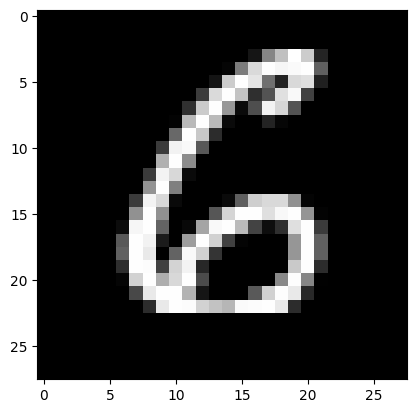

In [8]:
index=random.randrange(0,len(image_data))
plt.imshow(image_data[index],cmap='gray')
plt.show()

In [10]:
model=Sequential()
model.add(Conv2D(64,(3,3),input_shape=(28,28,1)))
model.add(Activation("relu"))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))
model.add(Dense(10))
model.add(Activation("softmax"))

In [11]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'] )

In [13]:
model.fit(image_data,labels,epochs=5,validation_split=0.3)

Epoch 1/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 56s 40ms/step - accuracy: 0.8167 - loss: 0.5596 - val_accuracy: 0.9658 - val_loss: 0.1108
Epoch 2/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 54s 41ms/step - accuracy: 0.9731 - loss: 0.0879 - val_accuracy: 0.9767 - val_loss: 0.0738
Epoch 3/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 57s 44ms/step - accuracy: 0.9821 - loss: 0.0571 - val_accuracy: 0.9831 - val_loss: 0.0563
Epoch 4/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 63s 48ms/step - accuracy: 0.9862 - loss: 0.0436 - val_accuracy: 0.9824 - val_loss: 0.0566
Epoch 5/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 50s 38ms/step - accuracy: 0.9882 - loss: 0.0357 - val_accuracy: 0.9770 - val_loss: 0.0805


In [14]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9746 - loss: 0.0822


[0.07226324826478958, 0.9776999950408936]

In [24]:
y_pred=model.predict(x_test)
y_pred

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


array([[8.7465341e-11, 1.3226112e-07, 1.1846013e-05, ..., 9.9997330e-01,
        3.6263075e-09, 1.0629762e-05],
       [5.0788240e-06, 8.1562639e-11, 9.9999487e-01, ..., 2.5451125e-10,
        4.4608881e-09, 1.4550453e-11],
       [1.3449705e-05, 9.9930251e-01, 1.3609733e-04, ..., 3.1907839e-05,
        2.8459032e-04, 1.7321439e-05],
       ...,
       [1.4801775e-16, 1.8422978e-11, 2.0514159e-12, ..., 3.0287192e-10,
        2.2849382e-09, 5.1555386e-08],
       [3.8988383e-06, 9.0626964e-11, 2.7211293e-08, ..., 1.9213862e-09,
        1.3997400e-04, 2.0691747e-04],
       [4.3768664e-03, 5.0201319e-09, 2.2478455e-03, ..., 3.0582736e-09,
        1.3003408e-03, 1.6058302e-05]], dtype=float32)

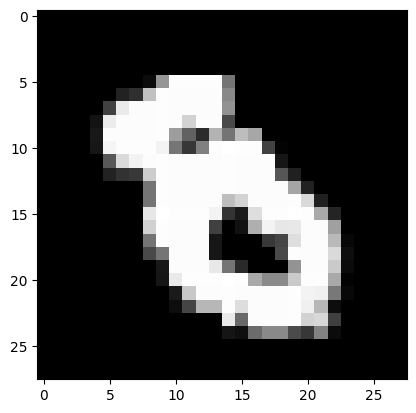

Our model says it is: [8]


In [56]:
index=random.randrange(0,len(x_test))
plt.imshow(x_test[index],cmap='gray')
plt.show()

y_classes=[np.argmax(y_pred[index])]
print('Our model says it is:',y_classes)